# FIDE & Google Efficient Chess AI Challenge

In [ ]:
import requests
from kaggle_environments import make

In [3]:
# インターネット接続の確認
requests.get("http://www.google.com", timeout=10).ok

True

## チェス用の環境構築
**前提知識**
- `agent.status`: エージェントの終了状態
    - ACTIVE:実行中
    - DONE:正常に終了
    - TIMEOUT:制限を超えたため終了
    - INVALID:無効なアクションを送信したため終了
    - CRASHED:エラーで終了
- `agent.observation.remainingOverageTime`: 各エージェントが持つ時間の残り（秒単位）

**MEMO**
- "random"の部分に自作したエージェント（クラス・関数）を指定すれば、「自作エージェント vs bot」の対局ができる

In [4]:
env = make("chess", debug=True)

Agent exit status/reward/time left: 
	 DONE / 0.5 / 10
	 DONE / 0.5 / 10





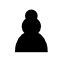
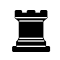
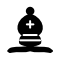
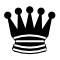
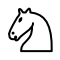
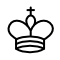
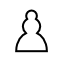
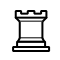
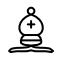
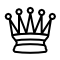
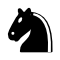
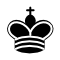

In [8]:
"""
env.run(["random", "random"])で、
ランダムな手を選択するエージェント同士で対局
"""
result = env.run(["random", "random"])

print("Agent exit status/reward/time left: ")
for agent in result[-1]:
    print("\t", agent.status, "/", agent.reward, "/", agent.observation.remainingOverageTime)
print("\n")

env.render(mode="ipython", width=500, height=500)

## 作成したbotで対戦

Agent exit status/reward/time left: 
	 DONE / 1 / 10
	 DONE / 0 / 10





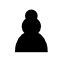
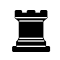
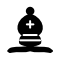
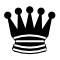
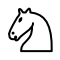
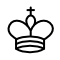
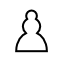
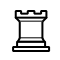
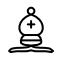
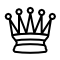
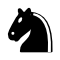
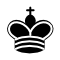

In [10]:
result = env.run(["main.py", "random"])
print("Agent exit status/reward/time left: ")
# look at the generated replay.json and print out the agent info
for agent in result[-1]:
    print("\t", agent.status, "/", agent.reward, "/", agent.observation.remainingOverageTime)
print("\n")
# render the game
env.render(mode="ipython", width=500, height=500)